
<div class="alert alert-primary" style="margin-top: 20px; padding: 20px; border-radius: 10px;background-color:  #A5A0D6  ; color: softblue;">

<h1><center>TELCO CHURN PREDICTION</center></h1>
    
</div>

![Açıklama](https://miro.medium.com/v2/resize:fit:1400/1*Xj5QTBN7umWESE_YrrDlhw.png)

# About Dataset

<div style="background-color: #fff2e6; padding: 20px; border-radius: 10px; border: 1px solid  #A5A0D6 ; color:  #A5A0D6 ;">
The Telco customer churn data contains information about a fictional telecom company that provides home phone and Internet services to 7043 customers in California in the third quarter. It shows which customers have left their services, stayed, or signed up for service.
</div>

| Variable            | Description                                                         |
|---------------------|---------------------------------------------------------------------|
| CustomerId          | Customer ID                                                         |
| Gender              | Gender                                                              |
| SeniorCitizen       | Whether the customer is a senior citizen (1, 0)                     |
| Partner             | Whether the customer has a partner (Yes, No)                        |
| Dependents          | Whether the customer has dependents (Yes, No)                       |
| Tenure              | Number of months the customer has stayed with the company           |
| PhoneService        | Whether the customer has phone service (Yes, No)                    |
| MultipleLines       | Whether the customer has multiple lines (Yes, No, No phone service) |
| InternetService     | Customer’s internet service provider (DSL, Fiber optic, No)         |
| OnlineSecurity      | Whether the customer has online security (Yes, No, No internet service) |
| OnlineBackup        | Whether the customer has online backup (Yes, No, No internet service) |
| DeviceProtection    | Whether the customer has device protection (Yes, No, No internet service) |
| TechSupport         | Whether the customer has tech support (Yes, No, No internet service) |
| StreamingTV         | Whether the customer has streaming TV (Yes, No, No internet service) |
| StreamingMovies     | Whether the customer has streaming movies (Yes, No, No internet service) |
| Contract            | Customer’s contract term (Month-to-month, One year, Two year)      |
| PaperlessBilling    | Whether the customer has paperless billing (Yes, No)               |
| PaymentMethod       | Customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges      | The amount charged to the customer monthly                          |
| TotalCharges        | The total amount charged to the customer                            |
| Churn               | Whether the customer churned (Yes or No)                            |


# Importing & Load Dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression



pd.set_option("display.width", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

df_ = pd.read_csv("/kaggle/input/telco-churn/Telco-Customer-Churn.csv")
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [2]:
df.columns = [col.upper() for col in df.columns]
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# Exploratory Data Analysis (EDA)

In [3]:
def check_df(df, head=5):
    print("#################### Shape ###################")
    print(df.shape)
    print("#################### Types ###################")
    print(df.dtypes)
    print("#################### NA ###################")
    print(df.isnull().sum())
    print("#################### Number of Unique Values #####################")
    print(df.nunique())
    print("#################### Quantiles ###################")
    print(df.describe([0, 0.05, 0.50, 0.95, 1]).T)
check_df(df)

#################### Shape ###################
(7043, 21)
#################### Types ###################
CUSTOMERID           object
GENDER               object
SENIORCITIZEN         int64
PARTNER              object
DEPENDENTS           object
TENURE                int64
PHONESERVICE         object
MULTIPLELINES        object
INTERNETSERVICE      object
ONLINESECURITY       object
ONLINEBACKUP         object
DEVICEPROTECTION     object
TECHSUPPORT          object
STREAMINGTV          object
STREAMINGMOVIES      object
CONTRACT             object
PAPERLESSBILLING     object
PAYMENTMETHOD        object
MONTHLYCHARGES      float64
TOTALCHARGES         object
CHURN                object
dtype: object
#################### NA ###################
CUSTOMERID          0
GENDER              0
SENIORCITIZEN       0
PARTNER             0
DEPENDENTS          0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEP

In [4]:
df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], errors='coerce')
df["CHURN"] = df["CHURN"].apply(lambda x : 1 if x == "Yes" else 0)
df.drop("CUSTOMERID", axis = 1, inplace = True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            7043 non-null   object 
 1   SENIORCITIZEN     7043 non-null   int64  
 2   PARTNER           7043 non-null   object 
 3   DEPENDENTS        7043 non-null   object 
 4   TENURE            7043 non-null   int64  
 5   PHONESERVICE      7043 non-null   object 
 6   MULTIPLELINES     7043 non-null   object 
 7   INTERNETSERVICE   7043 non-null   object 
 8   ONLINESECURITY    7043 non-null   object 
 9   ONLINEBACKUP      7043 non-null   object 
 10  DEVICEPROTECTION  7043 non-null   object 
 11  TECHSUPPORT       7043 non-null   object 
 12  STREAMINGTV       7043 non-null   object 
 13  STREAMINGMOVIES   7043 non-null   object 
 14  CONTRACT          7043 non-null   object 
 15  PAPERLESSBILLING  7043 non-null   object 
 16  PAYMENTMETHOD     7043 non-null   object 


GENDER               0
SENIORCITIZEN        0
PARTNER              0
DEPENDENTS           0
TENURE               0
PHONESERVICE         0
MULTIPLELINES        0
INTERNETSERVICE      0
ONLINESECURITY       0
ONLINEBACKUP         0
DEVICEPROTECTION     0
TECHSUPPORT          0
STREAMINGTV          0
STREAMINGMOVIES      0
CONTRACT             0
PAPERLESSBILLING     0
PAYMENTMETHOD        0
MONTHLYCHARGES       0
TOTALCHARGES        11
CHURN                0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

GENDER              0
SENIORCITIZEN       0
PARTNER             0
DEPENDENTS          0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEPROTECTION    0
TECHSUPPORT         0
STREAMINGTV         0
STREAMINGMOVIES     0
CONTRACT            0
PAPERLESSBILLING    0
PAYMENTMETHOD       0
MONTHLYCHARGES      0
TOTALCHARGES        0
CHURN               0
dtype: int64

# Variable Analysis

In [6]:
def grab_col_names(df, cat_th=10, car_th=20):

    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#########################################")
print(f"Cat_Cols : {cat_cols}")
print("#########################################")
print(f"Num_Cols : {num_cols}")
print("#########################################")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 2
#########################################
Cat_Cols : ['GENDER', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', 'SENIORCITIZEN', 'CHURN']
#########################################
Num_Cols : ['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES']
#########################################
Cat_But_Car : []


In [7]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
TENURE,7032.000,32.422,24.545,1.000,9.000,29.000,55.000,72.000
MONTHLYCHARGES,7032.000,64.798,30.086,18.250,35.587,70.350,89.862,118.750
TOTALCHARGES,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


        GENDER  Ratio
GENDER               
Male      3549 50.469
Female    3483 49.531
##########################################


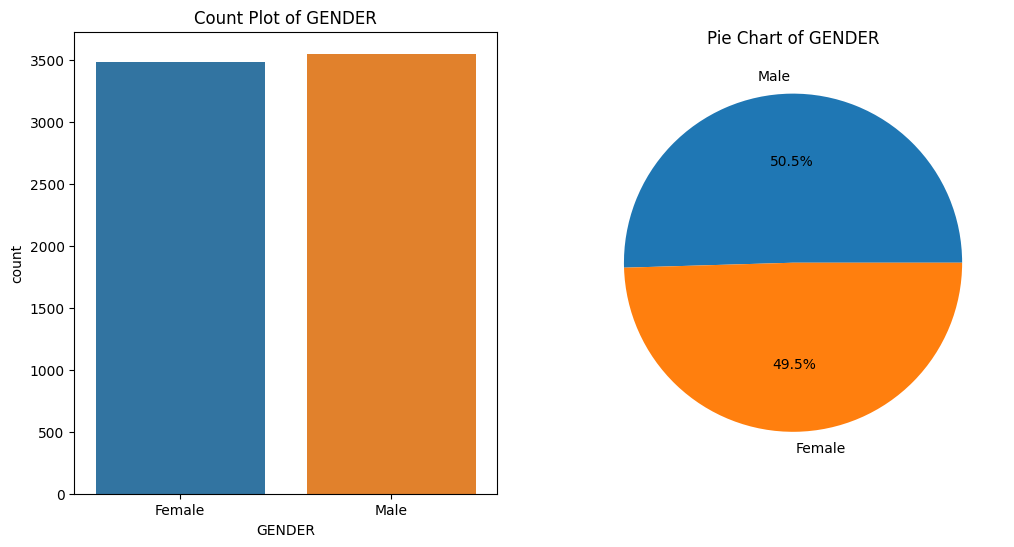

         PARTNER  Ratio
PARTNER                
No          3639 51.749
Yes         3393 48.251
##########################################


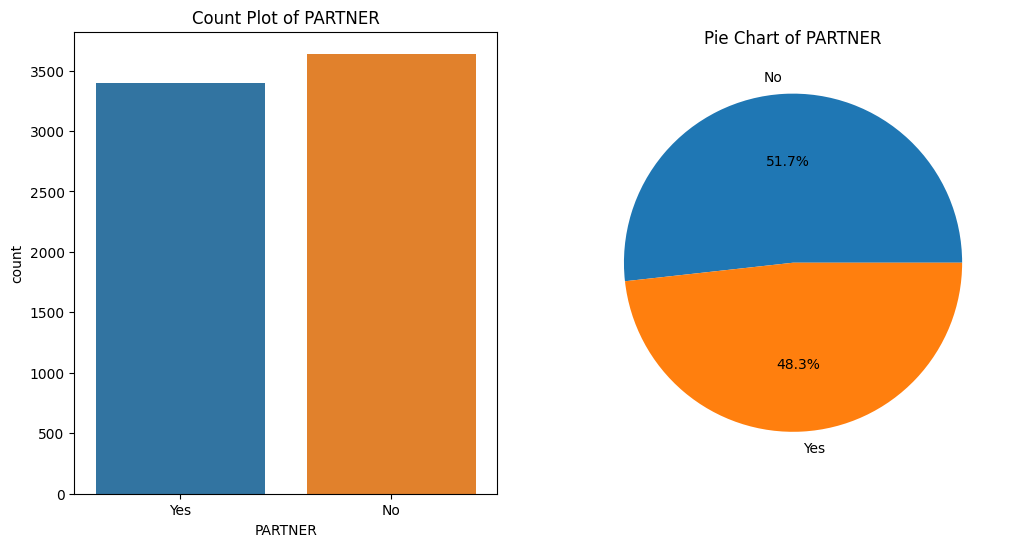

            DEPENDENTS  Ratio
DEPENDENTS                   
No                4933 70.151
Yes               2099 29.849
##########################################


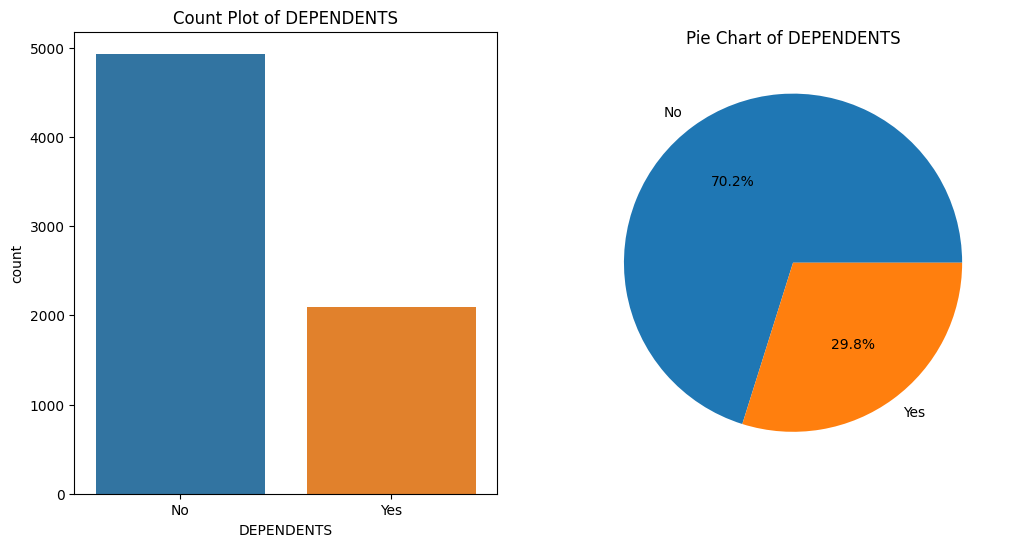

              PHONESERVICE  Ratio
PHONESERVICE                     
Yes                   6352 90.330
No                     680  9.670
##########################################


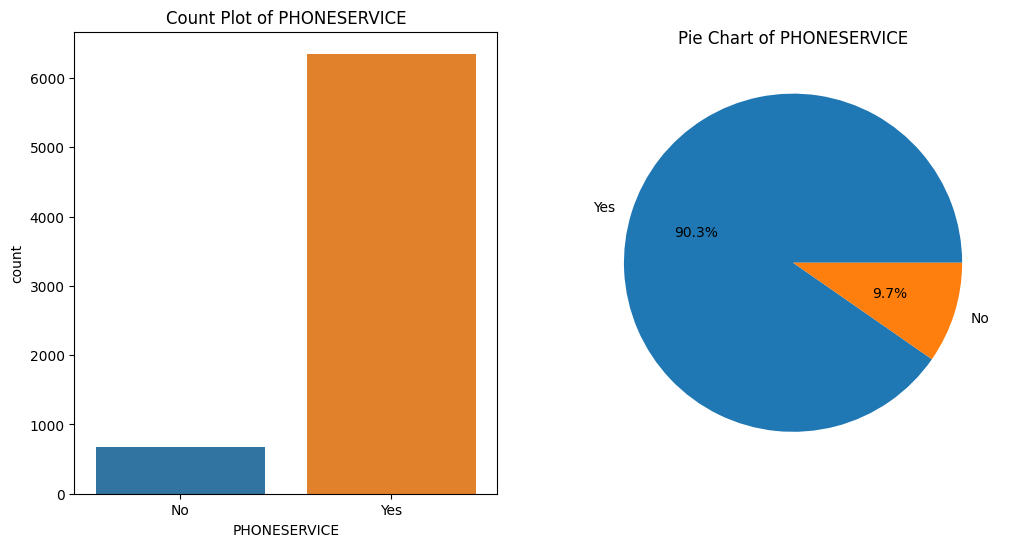

                  MULTIPLELINES  Ratio
MULTIPLELINES                         
No                         3385 48.137
Yes                        2967 42.193
No phone service            680  9.670
##########################################


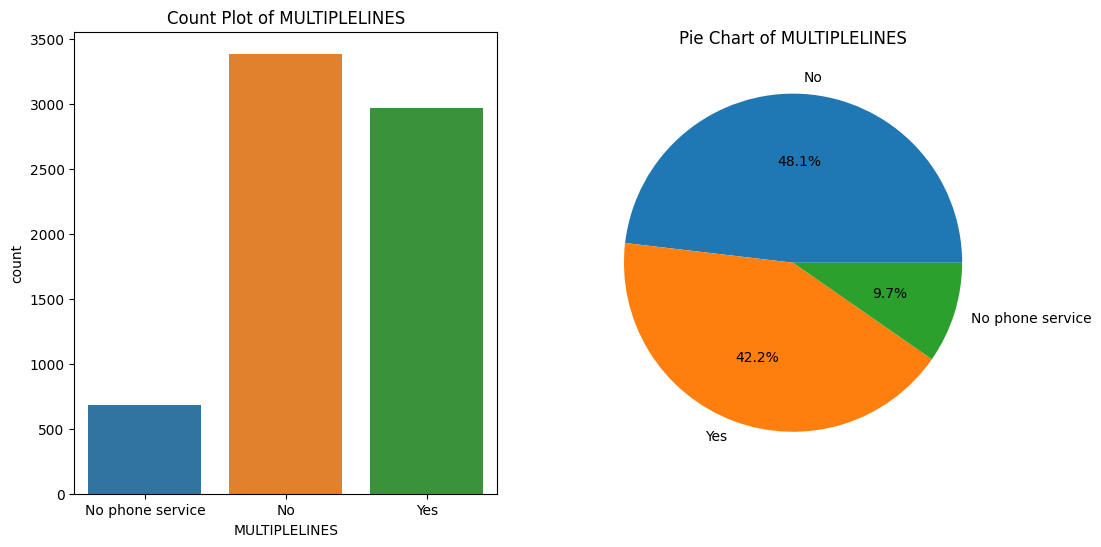

                 INTERNETSERVICE  Ratio
INTERNETSERVICE                        
Fiber optic                 3096 44.027
DSL                         2416 34.357
No                          1520 21.615
##########################################


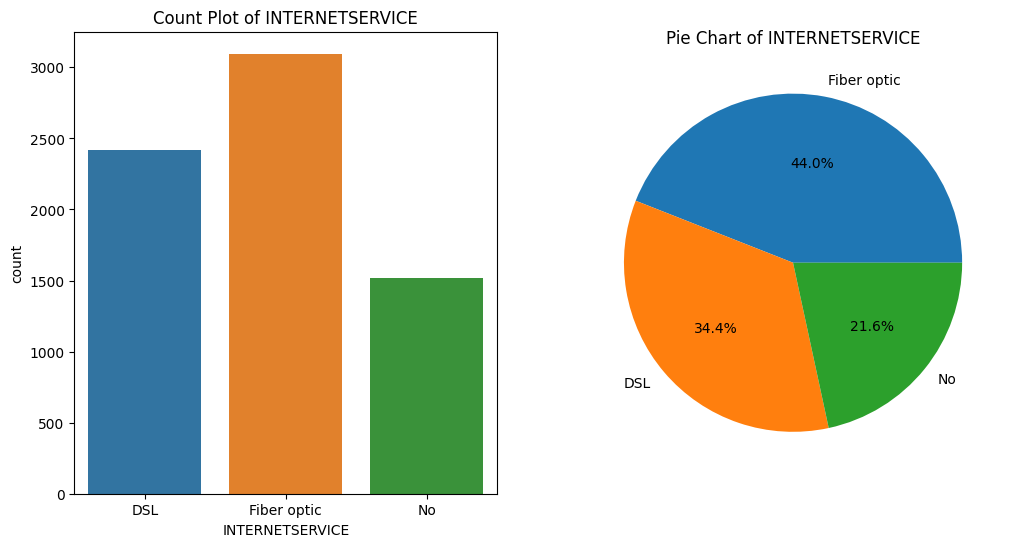

                     ONLINESECURITY  Ratio
ONLINESECURITY                            
No                             3497 49.730
Yes                            2015 28.655
No internet service            1520 21.615
##########################################


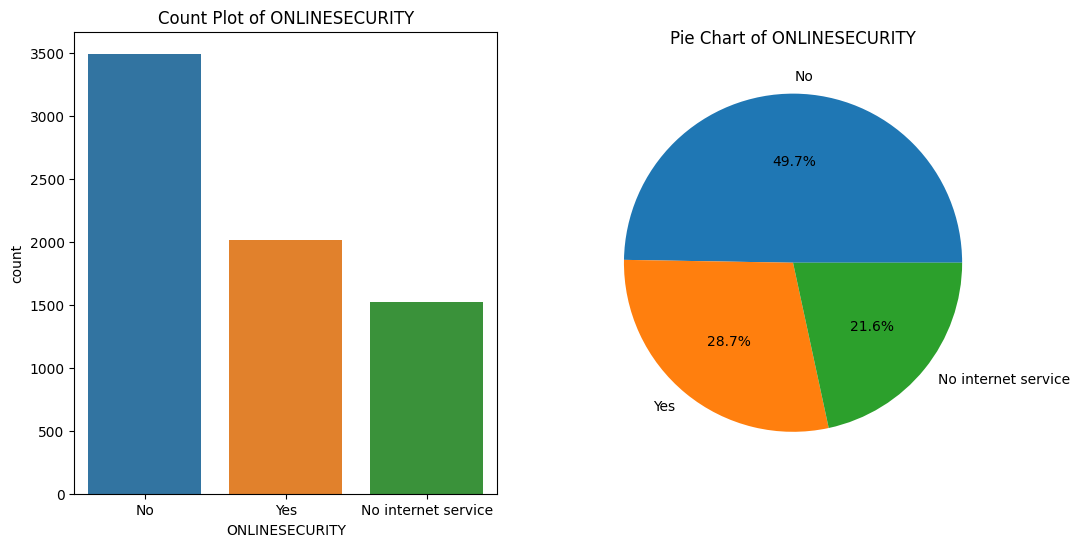

                     ONLINEBACKUP  Ratio
ONLINEBACKUP                            
No                           3087 43.899
Yes                          2425 34.485
No internet service          1520 21.615
##########################################


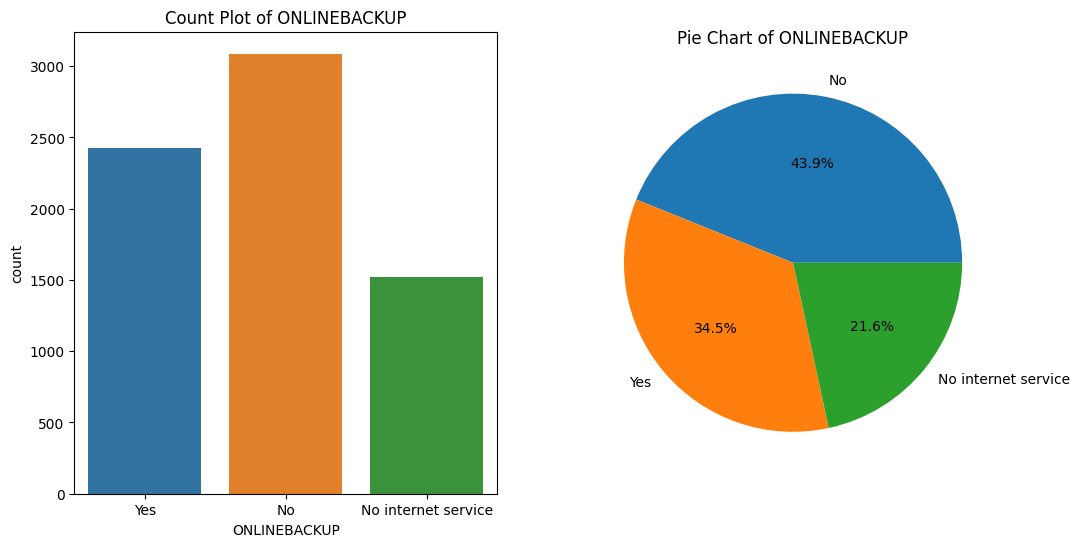

                     DEVICEPROTECTION  Ratio
DEVICEPROTECTION                            
No                               3094 43.999
Yes                              2418 34.386
No internet service              1520 21.615
##########################################


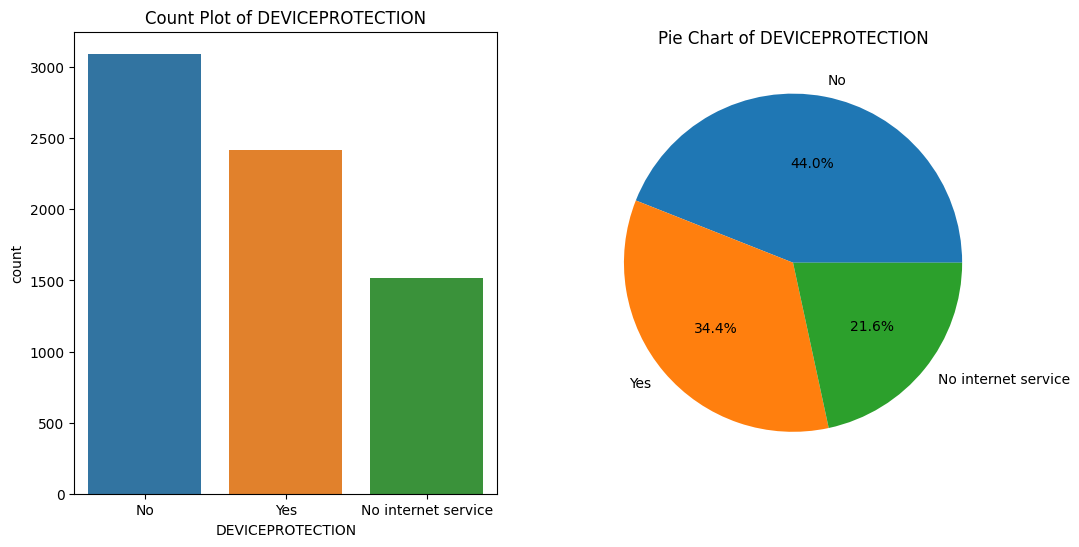

                     TECHSUPPORT  Ratio
TECHSUPPORT                            
No                          3472 49.374
Yes                         2040 29.010
No internet service         1520 21.615
##########################################


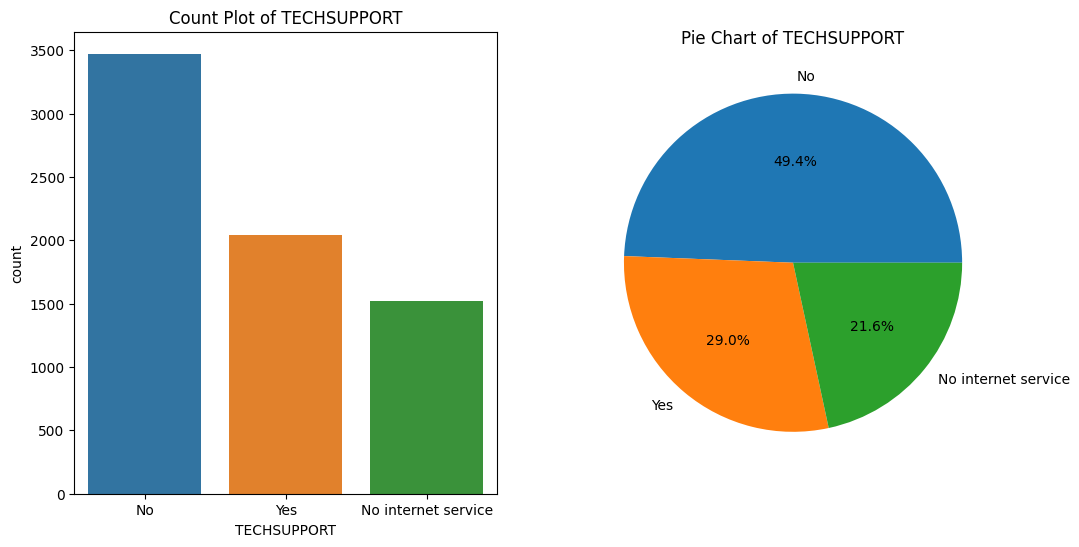

                     STREAMINGTV  Ratio
STREAMINGTV                            
No                          2809 39.946
Yes                         2703 38.439
No internet service         1520 21.615
##########################################


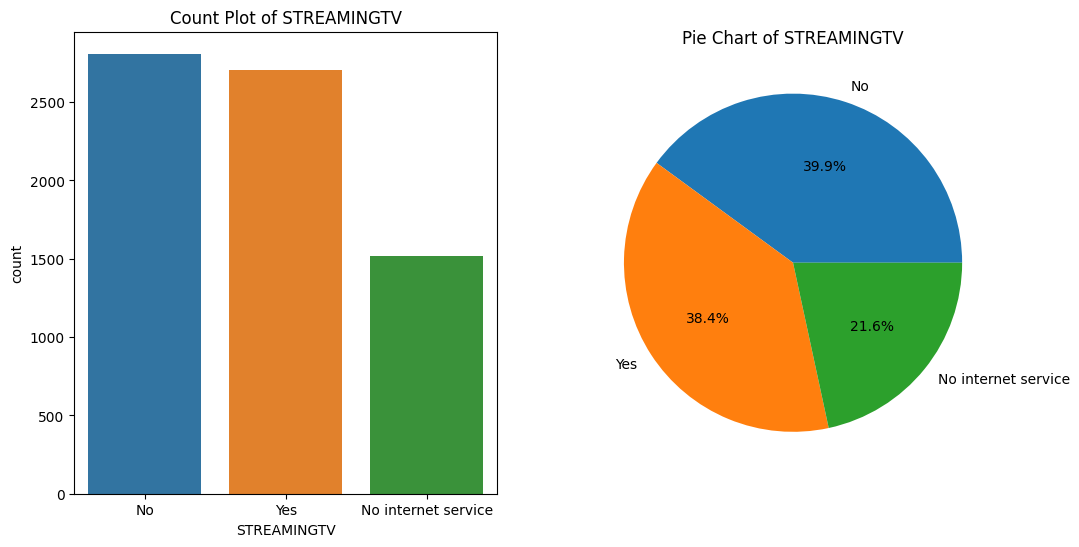

                     STREAMINGMOVIES  Ratio
STREAMINGMOVIES                            
No                              2781 39.548
Yes                             2731 38.837
No internet service             1520 21.615
##########################################


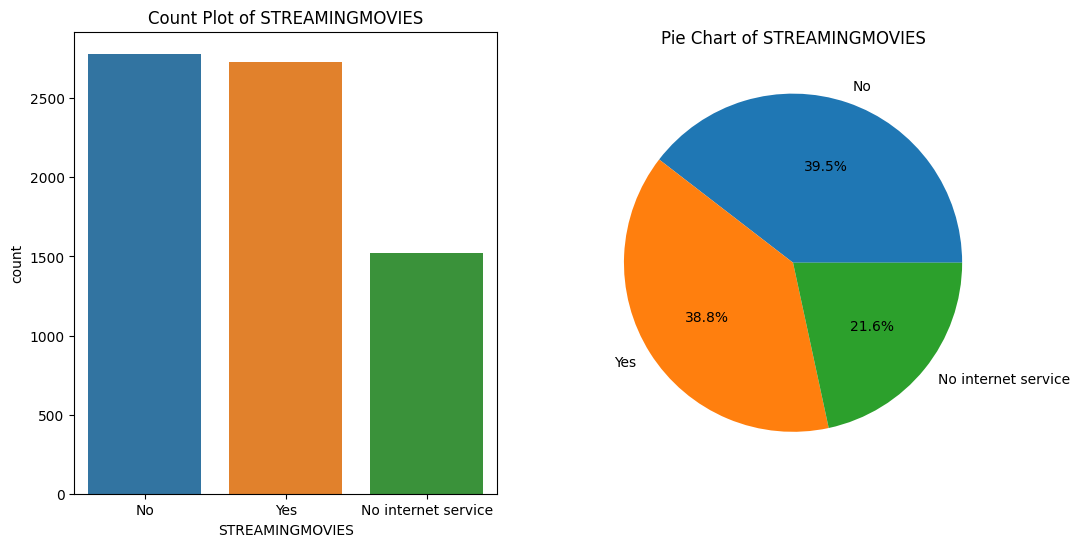

                CONTRACT  Ratio
CONTRACT                       
Month-to-month      3875 55.105
Two year            1685 23.962
One year            1472 20.933
##########################################


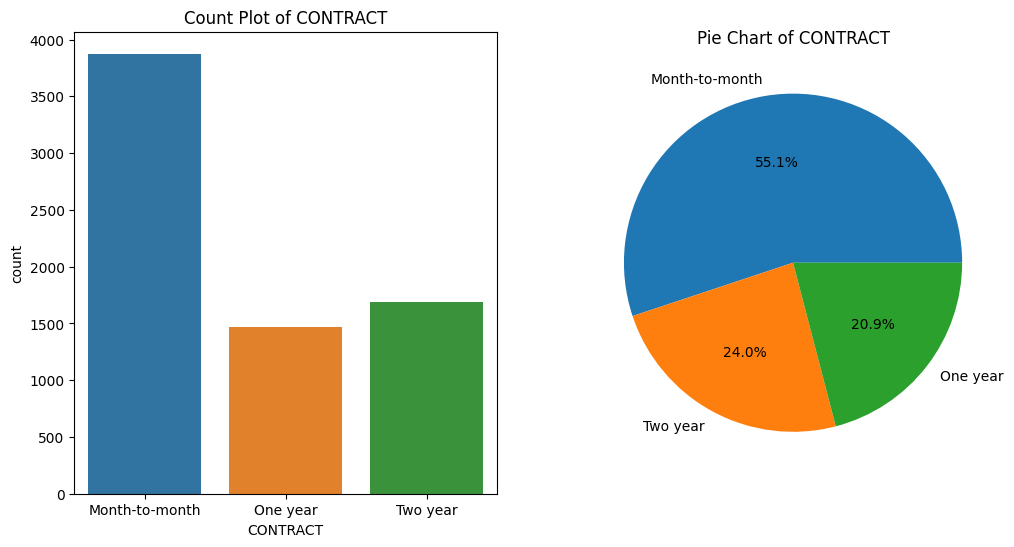

                  PAPERLESSBILLING  Ratio
PAPERLESSBILLING                         
Yes                           4168 59.272
No                            2864 40.728
##########################################


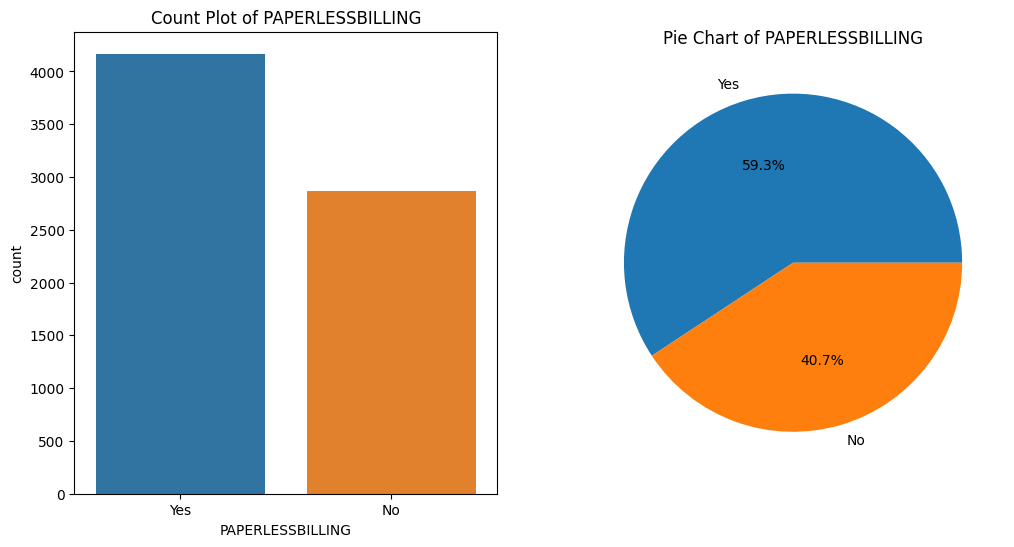

                           PAYMENTMETHOD  Ratio
PAYMENTMETHOD                                  
Electronic check                    2365 33.632
Mailed check                        1604 22.810
Bank transfer (automatic)           1542 21.928
Credit card (automatic)             1521 21.630
##########################################


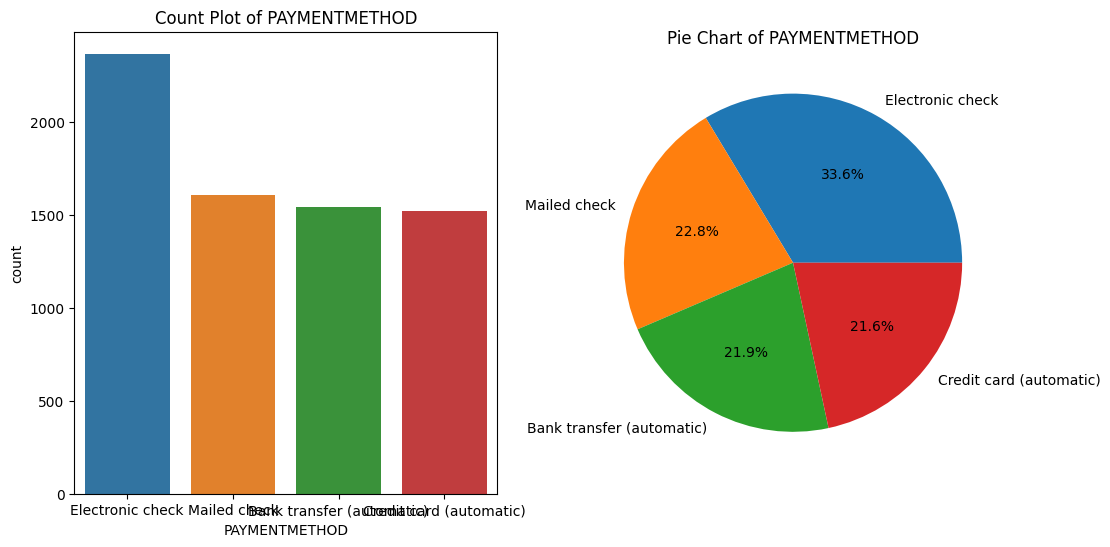

               SENIORCITIZEN  Ratio
SENIORCITIZEN                      
0                       5890 83.760
1                       1142 16.240
##########################################


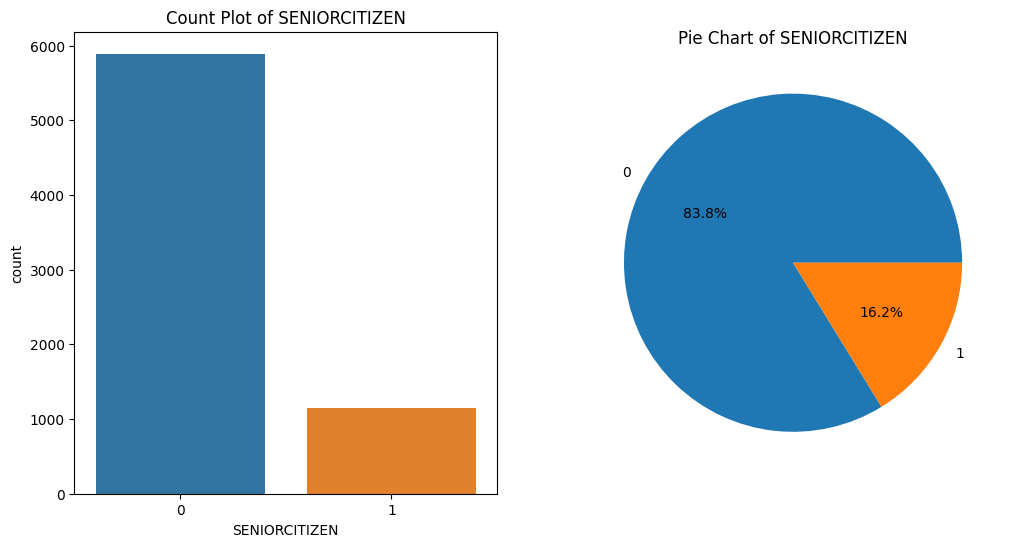

       CHURN  Ratio
CHURN              
0       5163 73.422
1       1869 26.578
##########################################


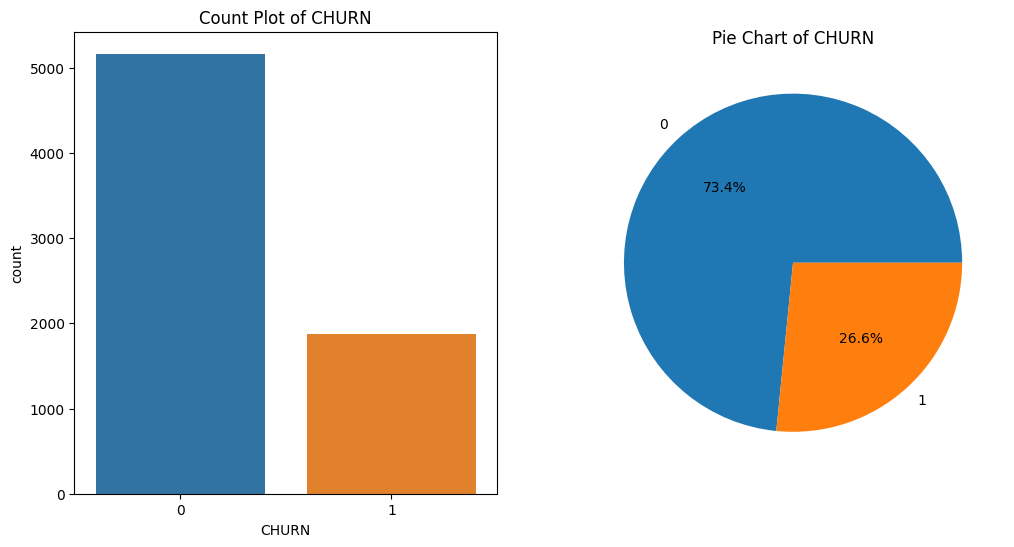

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        # Countplot
        sns.countplot(ax=axes[0], x=dataframe[col_name], data=dataframe)
        axes[0].set_title(f'Count Plot of {col_name}')
        
        # Pie chart
        dataframe[col_name].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
        axes[1].set_title(f'Pie Chart of {col_name}')
        axes[1].set_ylabel('')
        
        plt.show()

for col in cat_cols:
    cat_summary(df,col, plot=True)

count   7032.000
mean      32.422
std       24.545
min        1.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.800
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: TENURE, dtype: float64


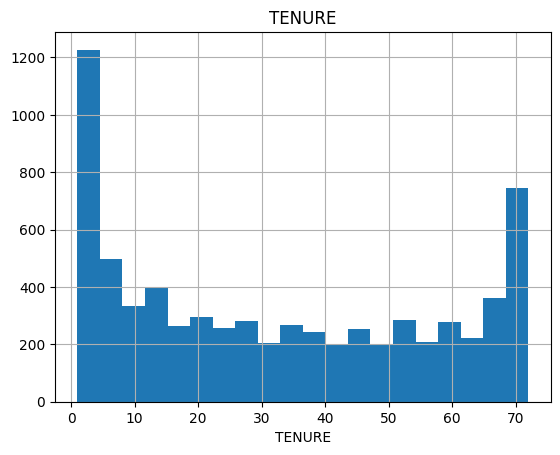

count   7032.000
mean      64.798
std       30.086
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.900
40%       58.920
50%       70.350
60%       79.150
70%       85.535
80%       94.300
90%      102.645
95%      107.422
99%      114.734
max      118.750
Name: MONTHLYCHARGES, dtype: float64


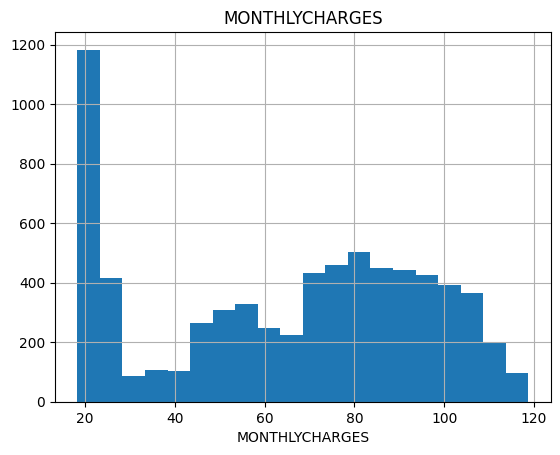

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TOTALCHARGES, dtype: float64


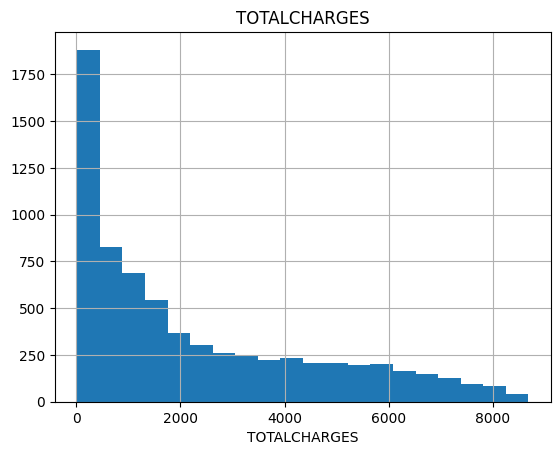

In [9]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

# Target Summary

In [10]:
def target_summary_with_num(df, target, num_col):
    print(df.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "CHURN", col)

       TENURE
CHURN        
0      37.650
1      17.979


       MONTHLYCHARGES
CHURN                
0              61.307
1              74.441


       TOTALCHARGES
CHURN              
0          2555.344
1          1531.796




In [11]:
corr_matrix = df[num_cols].corr()
corr_matrix

,TENURE,MONTHLYCHARGES,TOTALCHARGES
TENURE,1.000,0.247,0.826
MONTHLYCHARGES,0.247,1.000,0.651
TOTALCHARGES,0.826,0.651,1.000


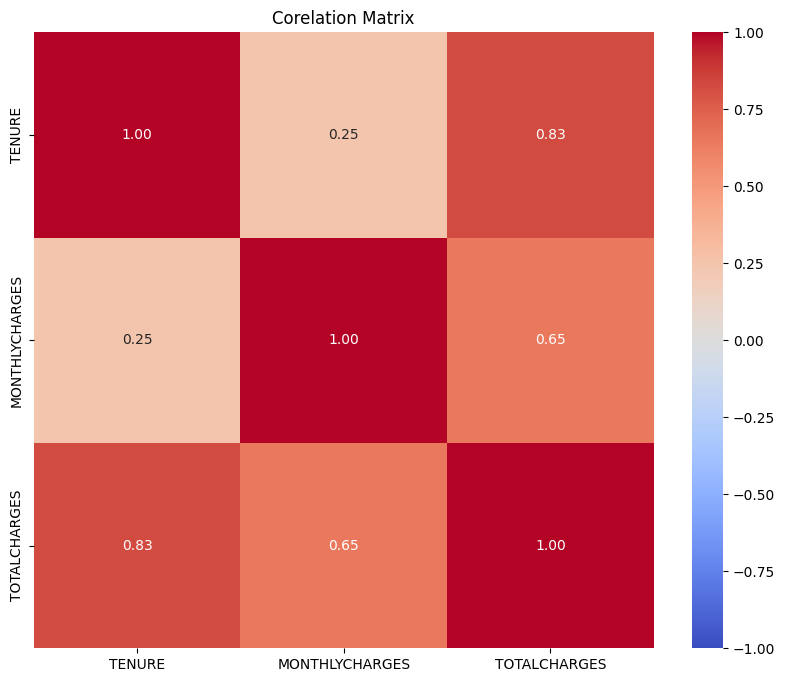

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Corelation Matrix")
plt.show();

# Outlier Analysis

In [13]:
def outlier_thresholds(df, col_name, q1=0.10, q3=0.90):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
def replace_with_thresholds(dataframe, variable, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.10, q3=0.90)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df.columns:
    print(col, check_outlier(df, num_cols))
    if check_outlier(df, num_cols):
        replace_with_thresholds(df, col)

GENDER False
SENIORCITIZEN False
PARTNER False
DEPENDENTS False
TENURE False
PHONESERVICE False
MULTIPLELINES False
INTERNETSERVICE False
ONLINESECURITY False
ONLINEBACKUP False
DEVICEPROTECTION False
TECHSUPPORT False
STREAMINGTV False
STREAMINGMOVIES False
CONTRACT False
PAPERLESSBILLING False
PAYMENTMETHOD False
MONTHLYCHARGES False
TOTALCHARGES False
CHURN False


# Feature Engineering

In [14]:
df["AVERAGE_MONTHLY_FEE"] = df["TOTALCHARGES"] / df["TENURE"]
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,29.850
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,55.574
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,54.075
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.906
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,75.825


In [15]:
df["MONTHLY_FEE_CHANGE"] = (df["TOTALCHARGES"] - df["MONTHLYCHARGES"]) / df["MONTHLYCHARGES"]
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,29.850,0.000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,55.574,32.178
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,54.075,1.008
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.906,42.517
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,75.825,1.145


In [16]:
df["NEW_CUSTOMER"] = df["TENURE"] < 12
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE,NEW_CUSTOMER
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,29.850,0.000,True
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,55.574,32.178,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,54.075,1.008,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.906,42.517,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,75.825,1.145,True


In [17]:
bin= [0, 12, 36, float("inf")]
label= ["Short_term", "Medium_term", "Long_term"]
df["TENURELEVEL"] = pd.cut(df["TENURE"], bins= bin, labels=label)
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE,NEW_CUSTOMER,TENURELEVEL
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,29.850,0.000,True,Short_term
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,55.574,32.178,False,Medium_term
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,54.075,1.008,True,Short_term
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.906,42.517,False,Long_term
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,75.825,1.145,True,Short_term


In [18]:
df["MONTHLYCHARGES"].describe().T
low_threshold = 30
high_threshold = 60

labels = ['Low', 'Medium', 'High']

df['PRICESEGMENT'] = pd.cut(df['MONTHLYCHARGES'], bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                            labels=labels)
df.head()

count   7032.000
mean      64.798
std       30.086
min       18.250
25%       35.587
50%       70.350
75%       89.862
max      118.750
Name: MONTHLYCHARGES, dtype: float64

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE,NEW_CUSTOMER,TENURELEVEL,PRICESEGMENT
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,29.850,0.000,True,Short_term,Low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,55.574,32.178,False,Medium_term,Medium
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,54.075,1.008,True,Short_term,Medium
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.906,42.517,False,Long_term,Medium
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,75.825,1.145,True,Short_term,High


# Encoding

In [19]:
def label_encoder(df, binary_col):
    le= LabelEncoder()
    df[binary_col] = le.fit_transform(df[binary_col])
    return df

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique()==2]

for col in binary_cols:
    df = label_encoder(df, col)
    
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE,NEW_CUSTOMER,TENURELEVEL,PRICESEGMENT
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,29.850,0.000,1,Short_term,Low
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,55.574,32.178,0,Medium_term,Medium
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,54.075,1.008,1,Short_term,Medium
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,40.906,42.517,0,Long_term,Medium
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,75.825,1.145,1,Short_term,High


In [20]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["CHURN"]]

def one_hot_encoder(df, cat_cols, drop_first=False):
    df = pd.get_dummies(df, columns=cat_cols, drop_first=drop_first)
    return df

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 ]

df = one_hot_encoder(df, ohe_cols, drop_first = True)
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE,NEW_CUSTOMER,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,TENURELEVEL_Medium_term,TENURELEVEL_Long_term,PRICESEGMENT_Medium,PRICESEGMENT_High
0,0,0,1,0,1,0,1,29.850,29.850,0,29.850,0.000,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,1,0,0,0,34,1,0,56.950,1889.500,0,55.574,32.178,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False
2,1,0,0,0,2,1,1,53.850,108.150,1,54.075,1.008,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,1,0,0,0,45,0,0,42.300,1840.750,0,40.906,42.517,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False
4,0,0,0,0,2,1,1,70.700,151.650,1,75.825,1.145,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GENDER                                 7032 non-null   int64  
 1   SENIORCITIZEN                          7032 non-null   int64  
 2   PARTNER                                7032 non-null   int64  
 3   DEPENDENTS                             7032 non-null   int64  
 4   TENURE                                 7032 non-null   int64  
 5   PHONESERVICE                           7032 non-null   int64  
 6   PAPERLESSBILLING                       7032 non-null   int64  
 7   MONTHLYCHARGES                         7032 non-null   float64
 8   TOTALCHARGES                           7032 non-null   float64
 9   CHURN                                  7032 non-null   int64  
 10  AVERAGE_MONTHLY_FEE                    7032 non-null   float64
 11  MONTHLY_F

In [22]:
numeric_columns = [col for col in df.columns if df[col].dtype in ["int", "float"]]
print(numeric_columns)

['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE', 'PAPERLESSBILLING', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN', 'AVERAGE_MONTHLY_FEE', 'MONTHLY_FEE_CHANGE', 'NEW_CUSTOMER']


# Standartization

In [23]:
for col in numeric_columns:
    df[col] = RobustScaler().fit_transform(df[[col]])
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,AVERAGE_MONTHLY_FEE,MONTHLY_FEE_CHANGE,NEW_CUSTOMER,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,TENURELEVEL_Medium_term,TENURELEVEL_Long_term,PRICESEGMENT_Medium,PRICESEGMENT_High
0,-1.000,0.000,1.000,0.000,-0.609,-1.000,0.000,-0.746,-0.403,0.000,-0.750,-0.599,1.000,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,0.000,0.000,0.000,0.000,0.109,0.000,-1.000,-0.247,0.145,0.000,-0.274,0.094,0.000,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False
2,0.000,0.000,0.000,0.000,-0.587,0.000,0.000,-0.304,-0.380,1.000,-0.302,-0.577,1.000,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,0.000,0.000,0.000,0.000,0.348,-1.000,-1.000,-0.517,0.131,0.000,-0.546,0.316,0.000,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False
4,-1.000,0.000,0.000,0.000,-0.587,0.000,0.000,0.006,-0.367,1.000,0.101,-0.574,1.000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


# ML Model

In [24]:
y = df["CHURN"]
X = df.drop(["CHURN"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=17)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred= reg_model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)


print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

LinearRegression()

Accuracy: 0.8
Recall: 0.66
Precision: 0.45
F1: 0.54
Auc: 0.74


In [25]:
reg_model.intercept_

reg_model.coef_

0.29130248007912657

array([ 0.00040282,  0.05037607,  0.00452019, -0.0227215 , -0.07654531,
       -0.03616947,  0.04816585,  0.01856582, -0.19275021,  0.12350541,
        0.03648382,  0.13895502,  0.03616947,  0.03649447,  0.12753075,
       -0.01522377, -0.01522377, -0.04260131, -0.01522377, -0.02550665,
       -0.01522377, -0.00722635, -0.01522377, -0.06001209, -0.01522377,
        0.02254375, -0.01522377,  0.04302506, -0.10237652, -0.08611843,
       -0.0083281 ,  0.05901784, -0.01566943,  0.00162593,  0.07896276,
       -0.02933775, -0.04079477])